In [34]:
# importing all the libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import descartes
# Setting the date as yesterday since current day's data is not available
date = dt.date.today() - dt.timedelta(days=6)
today = date.strftime("%-m/%d/%y")
print(today)

3/11/20


In [27]:
confirmed = pd.read_csv("/Users/dannyrambhatla/Documents/GitHub/EverythingData/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/covid-Confirmed.csv", index_col =0)

In [28]:
confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,...,43,43,43,47,48,50,50,50,53,59
NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,...,274,293,331,360,420,461,502,511,581,639
NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,...,108,110,110,117,130,138,150,150,160,178
NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,...,29,36,50,50,83,93,99,117,129,149


In [4]:
Deaths = pd.read_csv("/Users/dannyrambhatla/Documents/GitHub/EverythingData/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/covid-Deaths.csv",index_col=0)

In [5]:
Recovered = pd.read_csv("/Users/dannyrambhatla/Documents/GitHub/EverythingData/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/covid-Recovered.csv", index_col=0)

In [30]:
Confirmed_Cases_By_Country = confirmed.groupby('Country/Region')[today].sum().fillna(0).reset_index(name='Cases').sort_values(by='Cases', ascending=False)
Total_Confirmed_Cases = Confirmed_Cases_By_Country.sum()
print('Total Confirmed Cases are '+ str(Total_Confirmed_Cases.Cases))
print('Confirmed Cases by Country are ')
print(Confirmed_Cases_By_Country)

Total Confirmed Cases are 125865
Confirmed Cases by Country are 
      Country/Region  Cases
24             China  80921
54             Italy  12462
50              Iran   9000
58      Korea, South   7755
39            France   2284
..               ...    ...
55           Jamaica      1
44          Holy See      1
71            Monaco      1
26  Congo (Kinshasa)      1
57            Jordan      1

[114 rows x 2 columns]


In [33]:
Confirmed_Output = Confirmed_Cases_By_Country.to_json(orient='records')
print(Confirmed_Output)

[{"Country\/Region":"China","Cases":80921},{"Country\/Region":"Italy","Cases":12462},{"Country\/Region":"Iran","Cases":9000},{"Country\/Region":"Korea, South","Cases":7755},{"Country\/Region":"France","Cases":2284},{"Country\/Region":"Spain","Cases":2277},{"Country\/Region":"Germany","Cases":1908},{"Country\/Region":"US","Cases":1281},{"Country\/Region":"Cruise Ship","Cases":696},{"Country\/Region":"Switzerland","Cases":652},{"Country\/Region":"Japan","Cases":639},{"Country\/Region":"Norway","Cases":598},{"Country\/Region":"Netherlands","Cases":503},{"Country\/Region":"Sweden","Cases":500},{"Country\/Region":"United Kingdom","Cases":459},{"Country\/Region":"Denmark","Cases":444},{"Country\/Region":"Belgium","Cases":314},{"Country\/Region":"Qatar","Cases":262},{"Country\/Region":"Austria","Cases":246},{"Country\/Region":"Bahrain","Cases":195},{"Country\/Region":"Singapore","Cases":178},{"Country\/Region":"Malaysia","Cases":149},{"Country\/Region":"Australia","Cases":128},{"Country\/Regi

In [ ]:
Deaths_By_Country = Deaths.groupby('Country/Region')[today].sum().fillna(0).reset_index(name='Deaths').sort_values(by='Deaths', ascending=False)
Total_Deaths = Deaths_By_Country.sum()
print('Total Deaths are '+ str(Total_Deaths.Deaths))
print('Death Cases by Country are ')
print(Deaths_By_Country)

In [ ]:
Deaths_output = Deaths_by_Country.to_json(orient='records')

In [ ]:
Recovered_By_Country = Recovered.groupby('Country/Region')[today].sum().fillna(0).reset_index(name='Cases').sort_values(by='Cases', ascending=False)
Total_Recovered_Cases = Recovered_By_Country.sum()
print('Total Recovered Cases are '+ str(Total_Recovered_Cases.Cases))
print('Recovered Cases by Country are ')
print(Recovered_By_Country)

In [ ]:
Recovered_output = Recovered_By_Country.to_json(orient='records')
print(Recovered_output)

In [ ]:
Recoverytest = Recovered_By_Country.loc[(Recovered_By_Country.Cases!=0)]
print(Recoverytest)


In [ ]:
Cases = Recoverytest.Cases

#### Initialize the matplotlib figure

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))
sns.set_color_codes("pastel")
sns.barplot(x=Cases, y= "Country/Region", data=Recoverytest)
ax.set(xlabel = "Total Recovered Cases")

In [13]:
local = Recovered.groupby(['Country/Region','Province/State','Lat','Long'])[today].sum().fillna(0).reset_index(name='Cases').sort_values(by='Cases', ascending=False)
print(local)

    Country/Region       Province/State      Lat      Long  Cases
26           China                Hubei  30.9756  112.2707  49134
18           China            Guangdong  23.3417  113.4244   1282
24           China                Henan  33.8820  113.6140   1249
45           China             Zhejiang  29.1832  120.0934   1195
27           China                Hunan  27.6104  111.7088    995
..             ...                  ...      ...       ...    ...
132             US     Hillsborough, FL  27.9904  -82.3018      0
133             US  Honolulu County, HI  21.3070 -157.8584      0
134             US           Howard, IN  40.4483  -86.1345      0
135             US    Hudson County, NJ  40.7453  -74.0535      0
149             US          Johnson, IN  39.4638  -86.1345      0

[298 rows x 5 columns]


In [18]:
statecases = local.Cases
latitude = local.Lat
longitude = local.Long
Country = local["Country/Region"]
State = local["Province/State"]
print(Country)


26     China
18     China
24     China
45     China
27     China
       ...  
132       US
133       US
134       US
135       US
149       US
Name: Country/Region, Length: 298, dtype: object


- Filter dataframe by Lat and Long
- Plot a line on that single row

In [51]:
confirmed_new = confirmed[(confirmed["Country/Region"] == 'US') & (confirmed["Lat"] == 47.4009)]

In [52]:
print(confirmed_new)

               Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
Province/State                                                                
Washington                 US  47.4009 -121.4905        0        0        0   

                1/25/20  1/26/20  1/27/20  1/28/20  ...  3/2/20  3/3/20  \
Province/State                                      ...                   
Washington            0        0        0        0  ...       0       0   

                3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  \
Province/State                                                            
Washington           0       0       0       0       0       0      267   

                3/11/20  
Province/State           
Washington          366  

[1 rows x 53 columns]


In [92]:
confirmed_latest = confirmed_new.melt(id_vars = ['Country/Region','Lat','Long'],var_name='Day',value_name='Cases')

In [86]:
print(confirmed_latest)

   Country/Region      Lat      Long      Day  Cases
0              US  47.4009 -121.4905  1/22/20      0
1              US  47.4009 -121.4905  1/23/20      0
2              US  47.4009 -121.4905  1/24/20      0
3              US  47.4009 -121.4905  1/25/20      0
4              US  47.4009 -121.4905  1/26/20      0
5              US  47.4009 -121.4905  1/27/20      0
6              US  47.4009 -121.4905  1/28/20      0
7              US  47.4009 -121.4905  1/29/20      0
8              US  47.4009 -121.4905  1/30/20      0
9              US  47.4009 -121.4905  1/31/20      0
10             US  47.4009 -121.4905   2/1/20      0
11             US  47.4009 -121.4905   2/2/20      0
12             US  47.4009 -121.4905   2/3/20      0
13             US  47.4009 -121.4905   2/4/20      0
14             US  47.4009 -121.4905   2/5/20      0
15             US  47.4009 -121.4905   2/6/20      0
16             US  47.4009 -121.4905   2/7/20      0
17             US  47.4009 -121.4905   2/8/20 

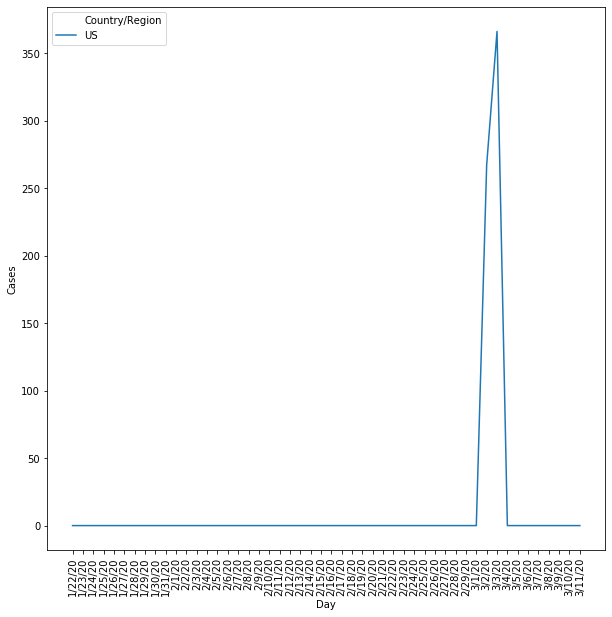

In [114]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels(confirmed_latest['Day'],rotation = 90) 
sns.lineplot(x=confirmed_latest['Day'],y = confirmed_latest['Cases'],hue = confirmed_latest['Country/Region'])